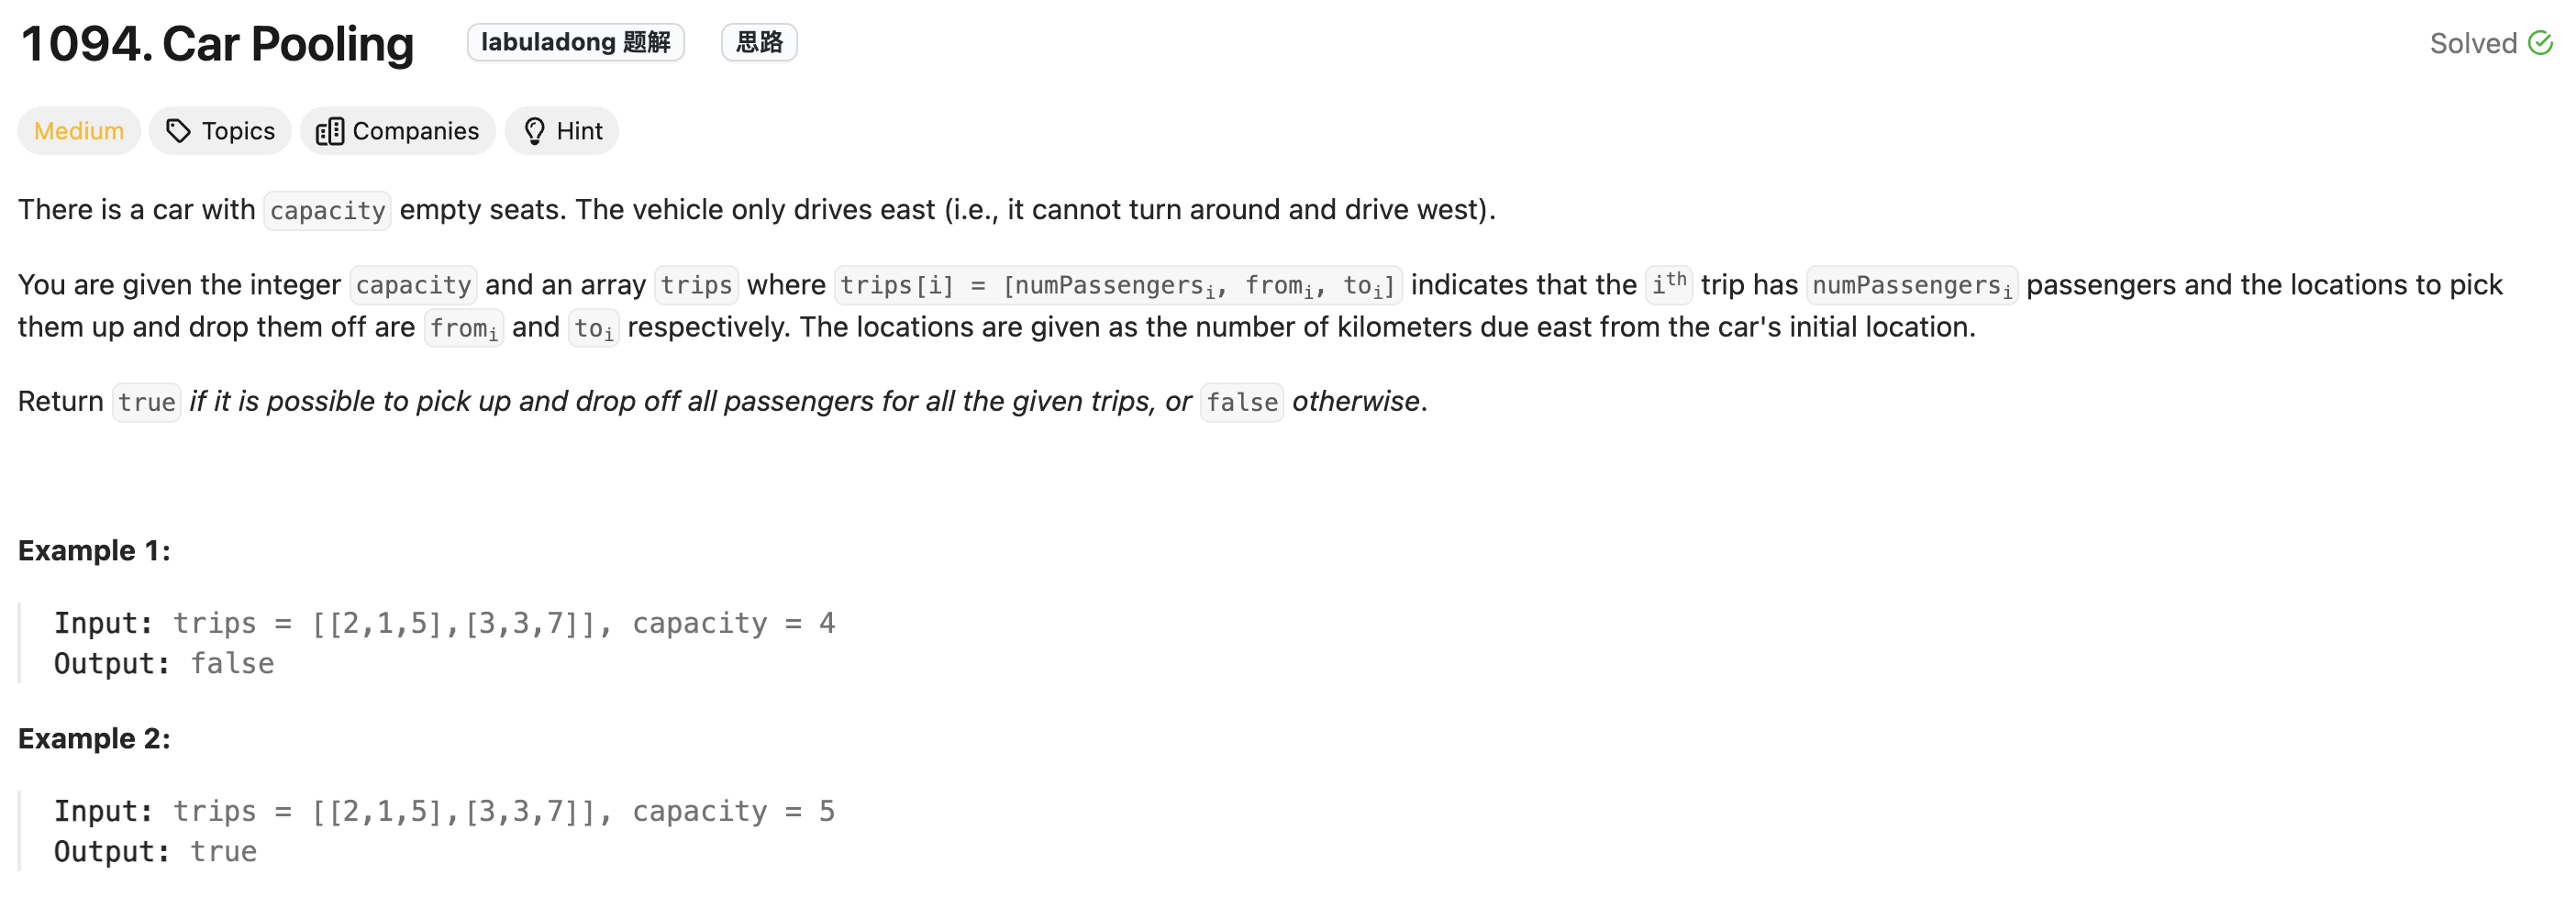

In [ ]:
class DiffArray:
    def __init__(self, nums):
        length = len(nums)
        diff = [0] * length
        diff[0] = nums[0]

        for i in range(1, length):
            diff[i] = nums[i] - nums[i - 1]
        self.diff = diff
        self.length = length

    def get(self):
        res = [0] * self.length
        res[0] = self.diff[0]
        for i in range(1, self.length):
            res[i] = res[i - 1] + self.diff[i]
        return res

    def increase(self, i, j, v):
        self.diff[i] += v
        if j + 1 < self.length:
            self.diff[j + 1] -= v


class Solution:
    def carPooling(self, trips: List[List[int]], capacity: int) -> bool:
        carries = [capacity] * 1001
        df_array = DiffArray(carries)
        for v, i, j in trips:
            df_array.increase(i, j-1, -v)
        res = df_array.get()
        for v in res:
            if v < 0:
                return False
        return True
